2002
711555


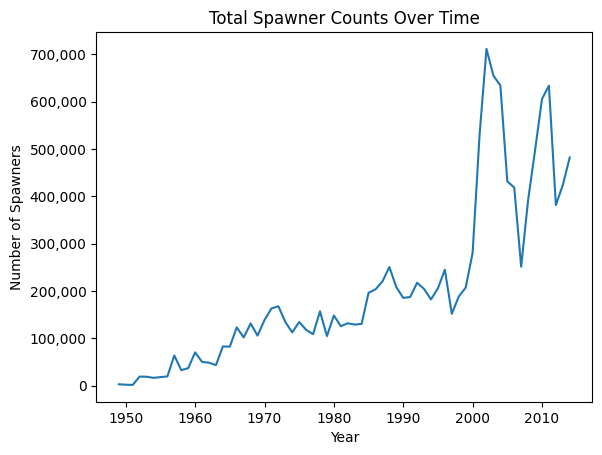

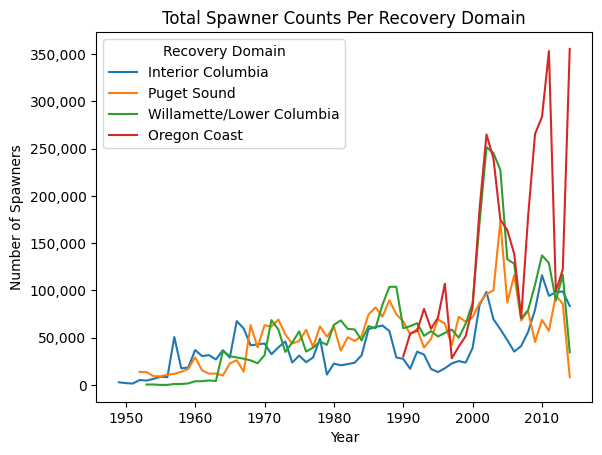

<ipython-input-2-3af85e80da77>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salmon_filtered[age_columns] = salmon_filtered[age_columns].replace(-99, 0)


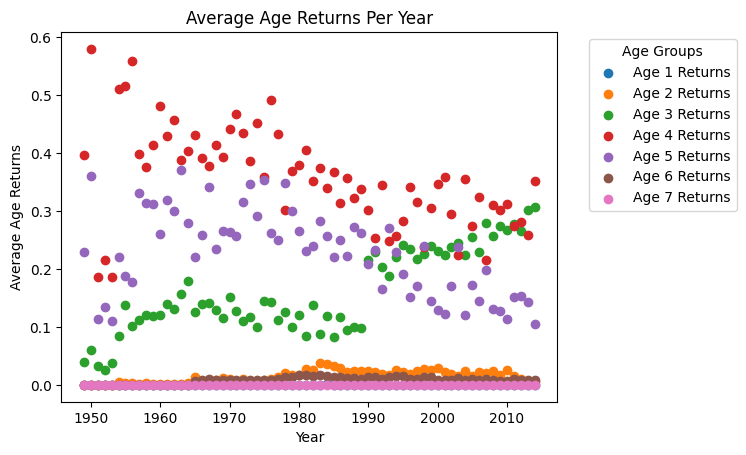

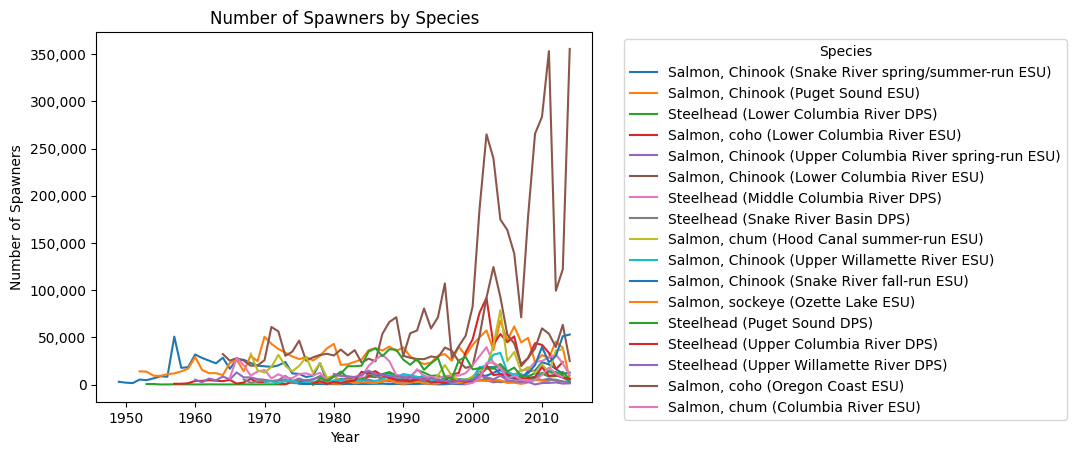

<ipython-input-2-3af85e80da77>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salmon_filtered["Run"] = salmon_filtered["Run"].str.strip().str.lower()
<ipython-input-2-3af85e80da77>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salmon_filtered["Run"] = salmon_filtered["Run"].replace({"-99": pd.NA, "late-run": "late fall", "winter": "winter-run"})


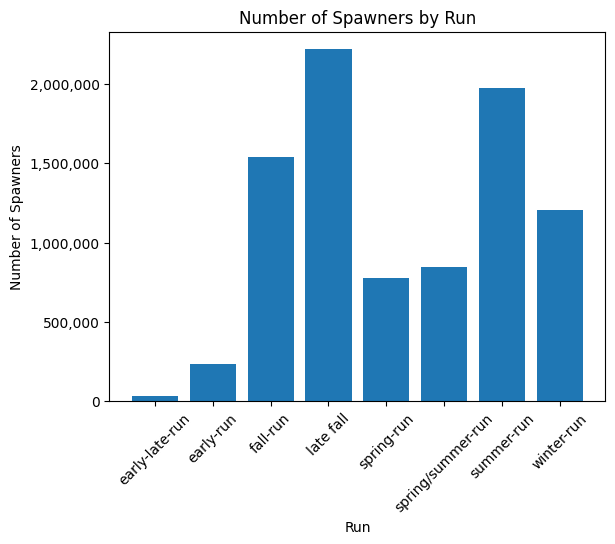

In [2]:
import pandas as pd
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

salmon = pd.read_csv("SPS_Status Review 2015.csv")

#Filtering 2015 because of incomplete data
salmon_filtered = salmon[salmon["Year"] != 2015]
#Total population over time
grouped = salmon_filtered.groupby("Year")["Number of Spawners"].sum().reset_index()
#Finding year with greatest number of spawners using idxmax (stackoverflow)
max_index = grouped["Number of Spawners"].idxmax()
max_year = grouped.loc[max_index, "Year"]
print(max_year)
print(grouped["Number of Spawners"].max())
plt.plot(grouped["Year"], grouped["Number of Spawners"], label = "Total Population")
plt.xlabel("Year")
plt.ylabel("Number of Spawners")
plt.title("Total Spawner Counts Over Time")
#Used to get tick marks for high y values (geeksforgeeks)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

#Spawn counts per Recovery Domain
grouped2 = salmon_filtered.groupby(["Year", "Recovery Domain"])["Number of Spawners"].sum().reset_index()

for i in grouped2["Recovery Domain"].unique():
    domain = grouped2[grouped2["Recovery Domain"] == i]
    plt.plot(domain["Year"], domain["Number of Spawners"], label = i)

plt.xlabel("Year")
plt.ylabel("Number of Spawners")
plt.title("Total Spawner Counts Per Recovery Domain")
plt.legend(title = "Recovery Domain")
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

#Average percent of Age 1-7 spawners returning to spawn by region
age_columns = ["Age 1 Returns", "Age 2 Returns", "Age 3 Returns", "Age 4 Returns", "Age 5 Returns", "Age 6 Returns", "Age 7 Returns"]
#Replace function for -99 values
salmon_filtered[age_columns] = salmon_filtered[age_columns].replace(-99, 0)
average_age_returns = salmon_filtered.groupby("Year")[age_columns].mean().reset_index()

for k in age_columns:
    plt.scatter(average_age_returns["Year"], average_age_returns[k], label = k)

plt.xlabel("Year")
plt.ylabel("Average Age Returns")
plt.title("Average Age Returns Per Year")
plt.legend(title="Age Groups", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Species Count per Region over time
species = salmon_filtered.groupby(["Year", "ESU Name"])["Number of Spawners"].sum().reset_index()

for i in species["ESU Name"].unique():
    species2 = species[species["ESU Name"] == i]
    plt.plot(species2["Year"], species2["Number of Spawners"], label = i)

plt.xlabel("Year")
plt.ylabel("Number of Spawners")
plt.title("Number of Spawners by Species")
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

#Number of spawners per run
#Normalize data
salmon_filtered["Run"] = salmon_filtered["Run"].str.strip().str.lower()
#Replace extraneous runs
salmon_filtered["Run"] = salmon_filtered["Run"].replace({"-99": pd.NA, "late-run": "late fall", "winter": "winter-run"})
salmon_filtered = salmon_filtered.dropna(subset=["Run"])
run = salmon_filtered.groupby(["Run"])["Number of Spawners"].sum().reset_index()

plt.bar(run["Run"], run["Number of Spawners"])
#Space out the columns (stackoverflow)
plt.xticks(rotation=45)
plt.xlabel("Run")
plt.ylabel("Number of Spawners")
plt.title("Number of Spawners by Run")
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()